<a href="https://colab.research.google.com/github/ManusPhromtha/PMU-B-PersonalAI/blob/main/xPore_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

RAND_STATE = 123
np.random.seed(RAND_STATE)

In [116]:
# Generate 1D data fro two normal distributions
mu = [1,3]
sd = [.8,.5]
data1 = np.random.normal(mu[0], sd[0], size=100) #สุ่ม 100จุด
data2 = np.random.normal(mu[1], sd[1], size=50) #สุ่ม 50จุด

In [117]:
# Scatter plots with histograms and normal distributions
def viz(data,mu,sd):
  green = '#40909A'
  orange = '#C76C2B'
  alpha = 0.5
  plt.figure()

  data_min = min(min(data[0]),min(data[1]))
  data_max = max(max(data[0]),max(data[1]))

  # Plot the 1st normal
  x = np.linspace(data_min, data_max, 100)
  p = norm.pdf(x, mu[0], sd[0])
  plt.plot(x, p, linewidth=2, color=green)

  # Plot the 2nd normal
  x = np.linspace(data_min, data_max, 100)
  p = norm.pdf(x, mu[1], sd[1])
  plt.plot(x, p, linewidth=2, color=orange)

  # Plot the histograms
  _ = plt.hist(data[0],bins=10,density=True,color=green,alpha=alpha)
  _ = plt.hist(data[1],bins=10,density=True,color=orange,alpha=alpha)

  # Plot the scatters
  plt.plot(data1,np.zeros(len(data[0])),linestyle='None',marker='o',markersize=10,alpha=alpha,c=green)
  plt.plot(data2,np.zeros(len(data[1])),linestyle='None',marker='o',markersize=10,alpha=alpha,c=orange)

  # Remove the Frame (borders)
  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

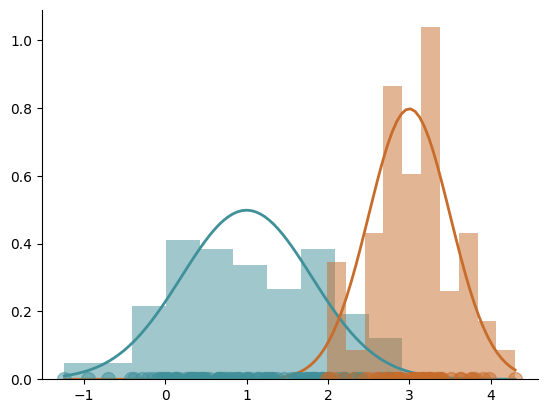

In [118]:
# Visualize the data generated by the two normal distributions
viz([list(data1)]+[list(data2)],mu,sd)

# HW : ต้องการหาว่ามี distribution กี่ตัว


In [120]:
# Given the generated data, infer the means and variances
import numpy as np
data = np.expand_dims(list(data1)+list(data2), axis=1)

## GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, init_params='random_from_data')
gmm.fit(data)

GaussianMixture(init_params='random_from_data', n_components=2)

GMM >>>
p(x) = 0.38*Normal(0.41,0.20)+0.62*Normal(2.48,0.30)


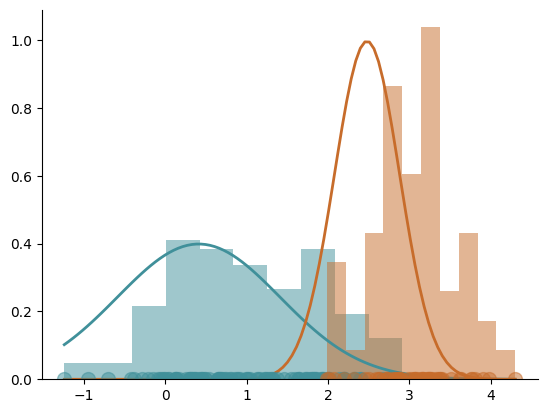

In [121]:
print('GMM >>>')
### HW: Complete the code below ###
w1,w2 = gmm.weights_ # Q1
mu1,mu2 = gmm.means_ # Q2
sd1,sd2 = [0.2,0.3]# Q3

print('p(x) = %.2f*Normal(%.2f,%.2f)+%.2f*Normal(%.2f,%.2f)' %(w1,mu1,sd1,w2,mu2,sd2))

# Visualize the data and the inferred norms.
viz([list(data1)]+[list(data2)],[mu1,mu2],[1,0.4]) # Q4
### End of HW ###